In [47]:
from dna_features_viewer import GraphicFeature, GraphicRecord
import pandas as pd
import math

color_dict = {
    "GH":"#ff99cc",
    "GT":"#ff99aa",
    "PL":"#ff6699",
    "CBM":"#99ff66",
    "CE":"#ff9999",
    "Sulf":"#ffff66",
    "Pept":"#ffcc66",
    "Int":"#666699",
    "Reg":"#33ccff",
    "Sugar":"#0066ff",
    "Trans":"#6600cc",
    "SusD":"#ff9933",
    "unk":"#cccccc"
}

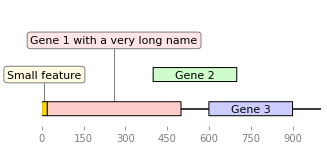

In [2]:
features=[
    GraphicFeature(start=0, end=20, strand=0, color="#ffd700",
                   label="Small feature"),
    GraphicFeature(start=600, end=900, strand=0, color="#ccccff",
                   label="Gene 3"),
    GraphicFeature(start=20, end=500, strand=0, color="#ffcccc",
                   label="Gene 1 with a very long name"),
    GraphicFeature(start=400, end=700, strand=0, color="#cffccc",
                   label="Gene 2")
]
record = GraphicRecord(sequence_length=1000, features=features)
record.plot(figure_width=5);

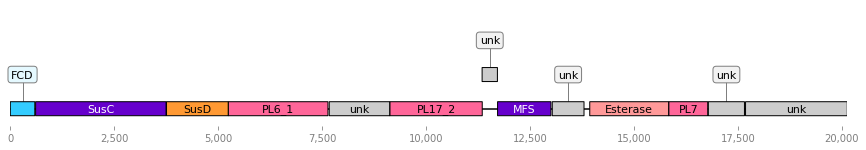

In [3]:
features=[]
genes=[(4678,5267,color_dict["Reg"],"FCD"),
       (5287,8424,color_dict["Trans"],"SusC"),
       (8435,9919,color_dict["SusD"],"SusD"),
       (9922,12318,color_dict["PL"],"PL6_1"),
       (12349,13803,color_dict["unk"],"unk"),
       (13807,16029,color_dict["PL"],"PL17_2"),
       (16026,16394,color_dict["unk"],"unk"),
       (16398,17681,color_dict["Trans"],"MFS"),
       (17713,18477,color_dict["unk"],"unk"),
       (18615,20513,color_dict["CE"],"Esterase"),
       (20518,21453,color_dict["PL"],"PL7"),
       (21467,22336,color_dict["unk"],"unk"),
       (22362,24809,color_dict["unk"],"unk")]
ref_s=genes[0][0]

for feat in genes:
    features.append(GraphicFeature(start=feat[0]-ref_s, 
                                   end=feat[1]-ref_s, 
                                   strand=0, 
                                   color=feat[2],
                                   label=feat[3]))
record = GraphicRecord(sequence_length=genes[-1][1]-ref_s, features=features)
record.plot(figure_width=15);

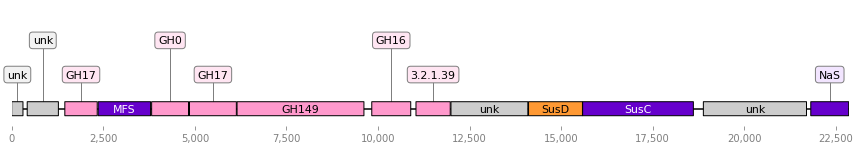

In [4]:
features=[]
genes=[(72424,72732,color_dict["unk"],"unk"),
       (72848,73699,color_dict["unk"],"unk"),
       (73875,74759,color_dict["GH"],"GH17"),
       (74786,76216,color_dict["Trans"],"MFS"),
       (76245,77252,color_dict["GH"],"GH0"),
       (77278,78558,color_dict["GH"],"GH17"),
       (78577,82041,color_dict["GH"],"GH149"),
       (82255,83319,color_dict["GH"],"GH16"),
       (83462,84397,color_dict["GH"],"3.2.1.39"),
       (84417,86516,color_dict["unk"],"unk"),
       (86535,88007,color_dict["SusD"],"SusD"),
       (88012,91035,color_dict["Trans"],"SusC"),
       (91308,94124,color_dict["unk"],"unk"),
       (94241,95275,color_dict["Trans"],"NaS")]
ref_s=genes[0][0]

for feat in genes:
    features.append(GraphicFeature(start=feat[0]-ref_s, 
                                   end=feat[1]-ref_s, 
                                   strand=0, 
                                   color=feat[2],
                                   label=feat[3]))
record = GraphicRecord(sequence_length=genes[-1][1]-ref_s, features=features)
record.plot(figure_width=15);

# Load data

In [18]:
gff = pd.read_table("artico.gff",sep="\t",comment="#",header=None)
gff.columns = ["sequid","source","type","start","end","score","strand","phase","attributes"]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
def ext_ID(data):
    return (data["attributes"].split(";")[0].split("=")[1])

gff["ID"] = gff.apply(ext_ID,axis=1)

In [5]:
df = pd.read_table("PULs.csv",sep=',')
df["ID"] = df.index.values
df = df.drop("distances")

def contig(data):
    return (data["ID"].split("_")[1])

def start_pos(data):
    return (data["ID"].split("_")[2].split("-")[0])

def end_pos(data):
    return (data["ID"].split("_")[2].split("-")[1])

df["contig"] = df.apply(contig,axis=1)
df["start"] = df.apply(start_pos,axis=1)
df["end"] = df.apply(end_pos,axis=1)

,distances,p_annots,c_annots,ID,contig,start,end
megahit_97196_1-246,1,PF16344 [Domain of unknown function (DUF4974)],NaN,megahit_97196_1-246,97196,1,246
megahit_97196_330-3701,TANDEM,PF07715 [TonB-dependent Receptor Plug Domain];...,NaN,megahit_97196_330-3701,97196,330,3701
megahit_97196_3711-5273,10,PF07980 [SusD family];PF14322 [Starch-binding ...,NaN,megahit_97196_3711-5273,97196,3711,5273
megahit_97196_5312-6835,39,PF00884 [Sulfatase];PF14707 [C-terminal region...,NaN,megahit_97196_5312-6835,97196,5312,6835
megahit_97196_6861-8336,26,PF00884 [Sulfatase],NaN,megahit_97196_6861-8336,97196,6861,8336
...,...,...,...,...,...,...,...
megahit_7976641_955-2445,13,PF07980 [SusD family];PF14322 [Starch-binding ...,NaN,megahit_7976641_955-2445,7976641,955,2445
megahit_7976641_2455-2997,10,PF02469 [Fasciclin domain],NaN,megahit_7976641_2455-2997,7976641,2455,2997
megahit_8010586_2-2569,TANDEM,PF00593 [TonB dependent receptor];TIGR04056 [],NaN,megahit_8010586_2-2569,8010586,2,2569
megahit_8010586_2596-4131,27,PF07980 [SusD family];PF14322 [Starch-binding ...,NaN,megahit_8010586_2596-4131,8010586,2596,4131


In [21]:
merged = pd.merge(df, gff, how="left", on="ID")

In [37]:
def change_strand(data):
    if (data["strand"]=="+"): strnd = 1;
    elif (data["strand"]=="-"): strnd = -1;
    else: strnd = 0
    return strnd
merged["val_strand"] = merged.apply(change_strand,axis=1)
merged

,distances,p_annots,c_annots,ID,contig,start_x,end_x,sequid,source,type,start_y,end_y,score,strand,phase,attributes,val_strand
0,1,PF16344 [Domain of unknown function (DUF4974)],NaN,megahit_97196_1-246,97196,1,246,megahit_97196,Prodigal_v2.6.3,CDS,1.0,246.0,11.1,+,0,ID=megahit_97196_1-246;partial=10;start_type=E...,1
1,TANDEM,PF07715 [TonB-dependent Receptor Plug Domain];...,NaN,megahit_97196_330-3701,97196,330,3701,megahit_97196,Prodigal_v2.6.3,CDS,330.0,3701.0,461.8,+,0,ID=megahit_97196_330-3701;partial=00;start_typ...,1
2,10,PF07980 [SusD family];PF14322 [Starch-binding ...,NaN,megahit_97196_3711-5273,97196,3711,5273,megahit_97196,Prodigal_v2.6.3,CDS,3711.0,5273.0,188.5,+,0,ID=megahit_97196_3711-5273;partial=00;start_ty...,1
3,39,PF00884 [Sulfatase];PF14707 [C-terminal region...,NaN,megahit_97196_5312-6835,97196,5312,6835,megahit_97196,Prodigal_v2.6.3,CDS,5312.0,6835.0,192.1,+,0,ID=megahit_97196_5312-6835;partial=00;start_ty...,1
4,26,PF00884 [Sulfatase],NaN,megahit_97196_6861-8336,97196,6861,8336,megahit_97196,Prodigal_v2.6.3,CDS,6861.0,8336.0,184.5,+,0,ID=megahit_97196_6861-8336;partial=00;start_ty...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,13,PF07980 [SusD family];PF14322 [Starch-binding ...,NaN,megahit_7976641_955-2445,7976641,955,2445,megahit_7976641,Prodigal_v2.6.3,CDS,955.0,2445.0,184.3,+,0,ID=megahit_7976641_955-2445;partial=00;start_t...,1
3386,10,PF02469 [Fasciclin domain],NaN,megahit_7976641_2455-2997,7976641,2455,2997,megahit_7976641,Prodigal_v2.6.3,CDS,2455.0,2997.0,38.0,+,0,ID=megahit_7976641_2455-2997;partial=01;start_...,1
3387,TANDEM,PF00593 [TonB dependent receptor];TIGR04056 [],NaN,megahit_8010586_2-2569,8010586,2,2569,megahit_8010586,Prodigal_v2.6.3,CDS,2.0,2569.0,340.5,+,0,ID=megahit_8010586_2-2569;partial=10;start_typ...,1
3388,27,PF07980 [SusD family];PF14322 [Starch-binding ...,NaN,megahit_8010586_2596-4131,8010586,2596,4131,megahit_8010586,Prodigal_v2.6.3,CDS,2596.0,4131.0,207.9,+,0,ID=megahit_8010586_2596-4131;partial=00;start_...,1


# Plot

6


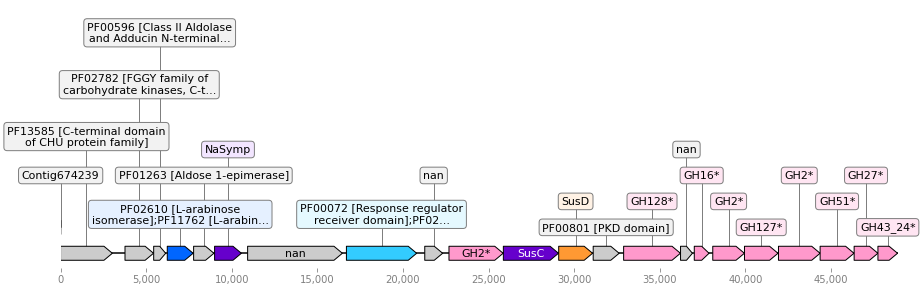

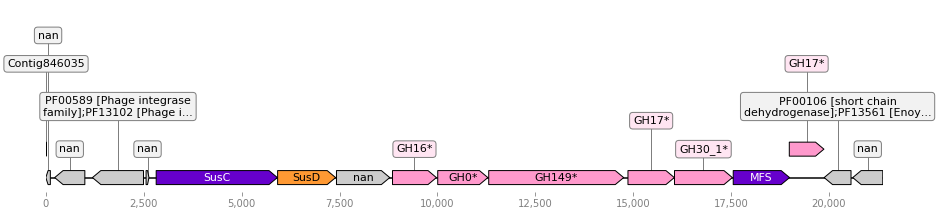

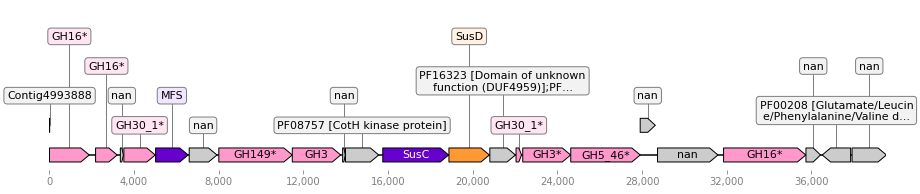

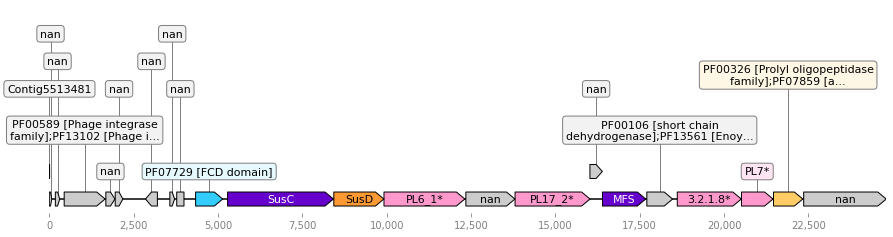

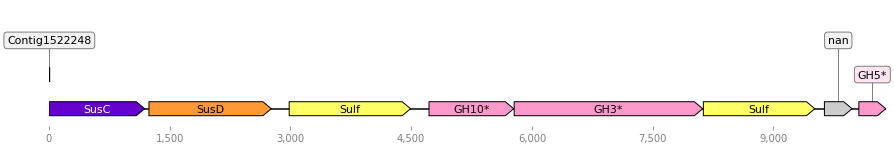

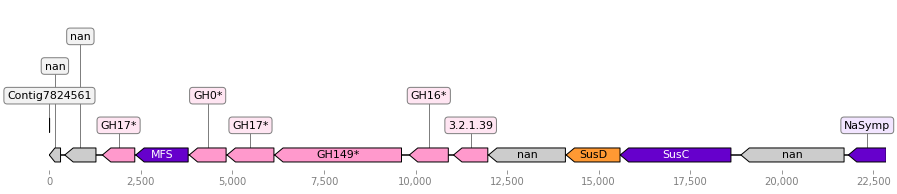

In [50]:
# Contigs interesantes: 5513481, 6393968, 7579255, 7824561
# Contigs interesantes: 674239, 846035, 4993888, 5513481, 6139934, 7824561
tot = 0
for contig in [str(674239), str(846035), str(4993888), str(5513481), str(1522248), str(7824561)]:
#for contig in (df["contig"].unique())[:]:
    genes = []
    features = []
    
    pul = merged[merged["contig"]==contig]
    # Get the genes in the contig
    for gene in pul.values:
        # Add         start        end          PFAM    CAZy    strand
        genes.append([int(gene[5]),int(gene[6]),gene[1],gene[2],gene[16]])
    ref_s = genes[0][0] #first gene
    genes.insert(0,[int(ref_s)+1,int(ref_s)+10,"Contig"+str(contig),0,0]) #initial feature with the contig name
    # Create a list with the plottable features for each gene
    for feat in genes:
        colkey = "unk" #default until other found
        lab = str(feat[2]) #default PFAM or unknown
        if not isinstance(feat[2],str): feat[2] = "unk"
        # Other sugar metabolism
        if ("arabinos" in feat[2]): colkey="Sugar"
        if ("mannos" in feat[2]): colkey="Sugar"
        if ("fucos" in feat[2]): colkey="Sugar"
        if ("xylos" in feat[2]): colkey="Sugar"
        if ("galactos" in feat[2]): colkey="Sugar"
        if ("glucos" in feat[2]): colkey="Sugar"
        # CAZymes
        if isinstance(feat[3],str): lab = str(feat[3]); colkey="GH"
        # Transporters
        if ("PF00593" in feat[2]): colkey="Trans"; lab="SusC"
        if ("PF07715" in feat[2]): colkey="Trans"; lab="SusC"
        if ("PF13715" in feat[2]): colkey="Trans"; lab="SusC"
        if ("TIGR04056" in feat[2]): colkey="Trans"; lab="SusC"
        if ("PF00472" in feat[2]): colkey="Trans"; lab="NaSymp" #sodium symporter
        if ("PF00474" in feat[2]): colkey="Trans"; lab="NaSymp"
        if ("PF07690" in feat[2]): colkey="Trans"; lab="MFS" #MFS
        if ("PF13347" in feat[2]): colkey="Trans"; lab="MFS" #MFS
        if ("ABC" in feat[2]): colkey="Trans"; lab="ABC" #ABC transporter
        # SusD
        if ("PF07980" in feat[2]): colkey="SusD"; lab="SusD"
        if ("PF12741" in feat[2]): colkey="SusD"; lab="SusD"
        if ("PF12771" in feat[2]): colkey="SusD"; lab="SusD"
        if ("PF14322" in feat[2]): colkey="SusD"; lab="SusD"
        # Sulfatase
        if ("PF00884" in feat[2]): colkey="Sulf"; lab="Sulf"
        # Peptidases
        if ("eptidase" in feat[2]): colkey="Pept"
        if ("roteinase" in feat[2]): colkey="Pept"
        if ("rotease" in feat[2]): colkey="Pept"
        # Regulators
        if ("PF00072" in feat[2]): colkey="Reg"
        if ("PF04773" in feat[2]): colkey="Reg"
        if ("PF00356" in feat[2]): colkey="Reg"
        if ("PF07729" in feat[2]): colkey="Reg"
        if ("ROK" in feat[2]): colkey="Reg"
        features.append(GraphicFeature(start=feat[0]-ref_s, 
                                   end=feat[1]-ref_s, 
                                   strand=feat[4], 
                                   color=color_dict[colkey],
                                   label=lab))
    # if there are more than 2 genes annotated as cazymes,plot
    if len([i for i in features if i.color=="#ff99cc"])>2:
        record = GraphicRecord(sequence_length=genes[-1][1]-ref_s, features=features)
        record.plot(figure_width=15)
        tot += 1    
print(tot)